'''1.Loading and Reading the Image:
Input format: Determine the format of the image (e.g., JPEG, PNG, BMP).
Library: Use a suitable library like OpenCV, PIL (Python Imaging Library), or scikit-image to load and read the image data.

2. Converting to Grayscale (if necessary):
Color channels: If the image is in color, convert it to grayscale to reduce dimensionality and simplify processing.

Algorithms: Use algorithms like averaging or weighted averaging to convert color pixels to grayscale values.

3. Resizing:
Uniform size: Resize the image to a consistent size for batch processing or algorithm compatibility.
Aspect ratio: Maintain the aspect ratio to avoid distortion.
Interpolation: Use interpolation methods like nearest neighbor, bilinear, or bicubic to fill in pixel values during resizing.

4. Cropping:
Focus on region of interest: Crop the image to focus on the relevant region.
Center cropping: Crop around the center of the image.
Random cropping: Crop random regions for data augmentation.

5. Normalization:
Scaling: Scale pixel values to a specific range (e.g., 0-1 or -1 to 1) for numerical stability.
Mean and standard deviation: Normalize pixel values using the mean and standard deviation of the dataset.

6. Data Augmentation:
Increase dataset size: Apply transformations to create new, varied images.
Techniques to use: include flipping, rotation, shearing, zooming, and adding noise.

7. Noise Reduction:
Remove noise: Apply one of the filters to reduce noise: Gaussian blur or median filtering or bilateral filtering.


Candidates will be judged on the following 2 criteria:

1. How many of the tasks above they manage to complete
2. Code Cleanliness and readability'''

## IMporting the required libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import PIL
from PIL import Image, ImageFilter
import cv2
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import random

In [9]:
#definig the image path
path = "C:/Users/getan/Downloads/frame_478.jpg"

In [10]:
img = mpimg.imread(path)

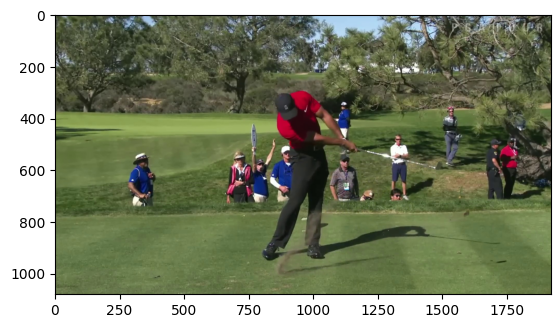

In [12]:
plt.imshow(img)

## Detrminig the image format

In [14]:
image = Image.open("C:/Users/getan/Downloads/frame_478.jpg")

In [16]:
print(f"The image format is: {image.format}")

The image format is: JPEG


## Converting to grayscale

In [21]:
image_array = np.array(image)


In [22]:
grayscale_array = np.mean(image_array, axis = 2)


In [23]:
grayscale_image = Image.fromarray(grayscale_array.astype(np.uint8))

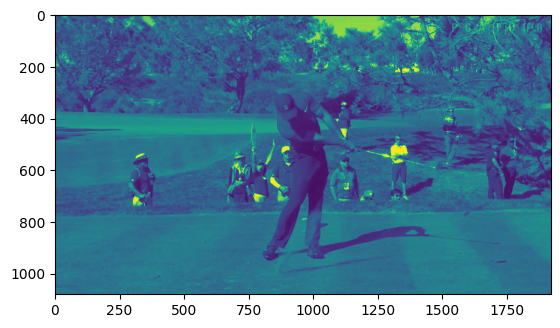

In [24]:
plt.imshow(grayscale_image)

## Resizing

#### Uniform size: Resize the image to a consistent size for batch processing or algorithm compatibility.
#### Aspect ratio: Maintain the aspect ratio to avoid distortion.
#### Interpolation: Use interpolation methods like nearest neighbor, bilinear, or bicubic to fill in pixel values during resizing.

In [25]:
new_size = (240,240)

In [28]:
resized_image = grayscale_image.resize(new_size, Image.NEAREST)

C:\Users\getan\AppData\Local\Temp\ipykernel_13656\2895499602.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  resized_image = grayscale_image.resize(new_size, Image.NEAREST)


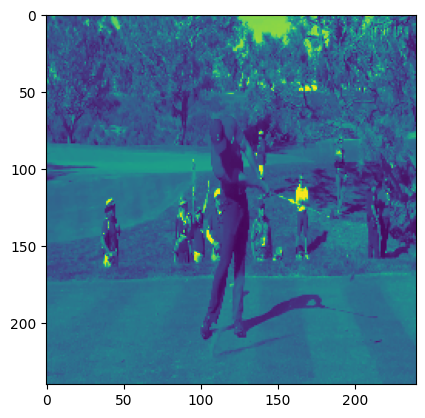

In [29]:
plt.imshow(resized_image)

## Cropping:
#### Focus on region of interest: Crop the image to focus on the relevant region.
#### Center cropping: Crop around the center of the image.
#### Random cropping: Crop random regions for data augmentation.

In [31]:
##Center Cropping 

def center_crop(image, crop_width, crop_height):
    width, height = image.size
    
    left = (width - crop_width) // 2
    top = (height - crop_height) // 2
    right = (width + crop_width) // 2
    bottom = (height + crop_height) // 2
    
    return image.crop((left, top, right, bottom))
    

In [32]:
center_cropped_image = center_crop(resized_image, 200, 200)

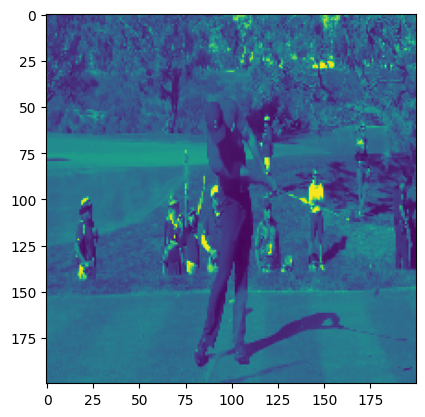

In [33]:
plt.imshow(center_cropped_image)

In [34]:
##Random Cropping
import random

def random_cropping(image, crop_width, crop_height):
    width, height = image.size
    
    if crop_width > width or crop_height > height:
        raise ValueError("error size")
        
    left = random.randint(0 ,width - crop_width)
    top = random.randint(0, height - crop_height)
    
    right = left+ crop_width
    bottom = top + crop_height
    
    return image.crop((left, top, right, bottom))

In [35]:
random_cropped_image = random_cropping(resized_image, 200, 200)

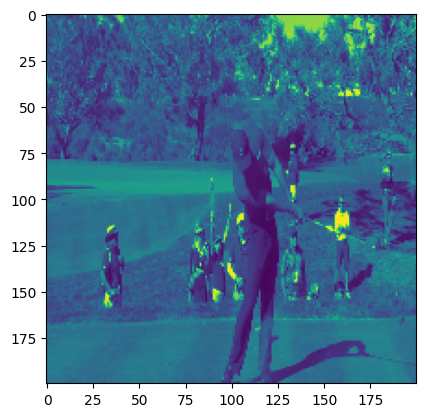

In [36]:
plt.imshow(random_cropped_image)

# Normalization:
#### Scaling: Scale pixel values to a specific range (e.g., 0-1 or -1 to 1) for numerical stability.
#### Mean and standard deviation: Normalize pixel values using the mean and standard deviation of the dataset.

In [41]:
def normalized_image(image, mean, std):
    image_array = np.array(image).astype(np.float32)
    normalized_image_array = (image_array - mean)/std
    normalized_image_array = np.clip(normalized_image_array, 0, 255).astype(np.uint8)
    
    return Image.fromarray(normalized_image_array)


In [42]:
image_array = np.array(resized_image)

In [43]:
mean = np.mean(image_array)
std = np.std(image_array)

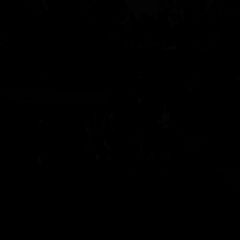

In [44]:
normalized_image(resized_image, mean, std)

## Data Augmentation:
#### Increase dataset size: Apply transformations to create new, varied images.
#### Techniques to use: include flipping, rotation, shearing, zooming, and adding noise.

In [54]:
# Initialize ImageDataGenerator with your augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the original image
img = load_img('C:/Users/getan/Downloads/frame_478.jpg')  
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  

# Directory to save the generated images
save_dir = "C:/Users/getan/Desktop/augmented_images/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Generate and save 5 augmented images
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 5:  # Generate 5 images
        break


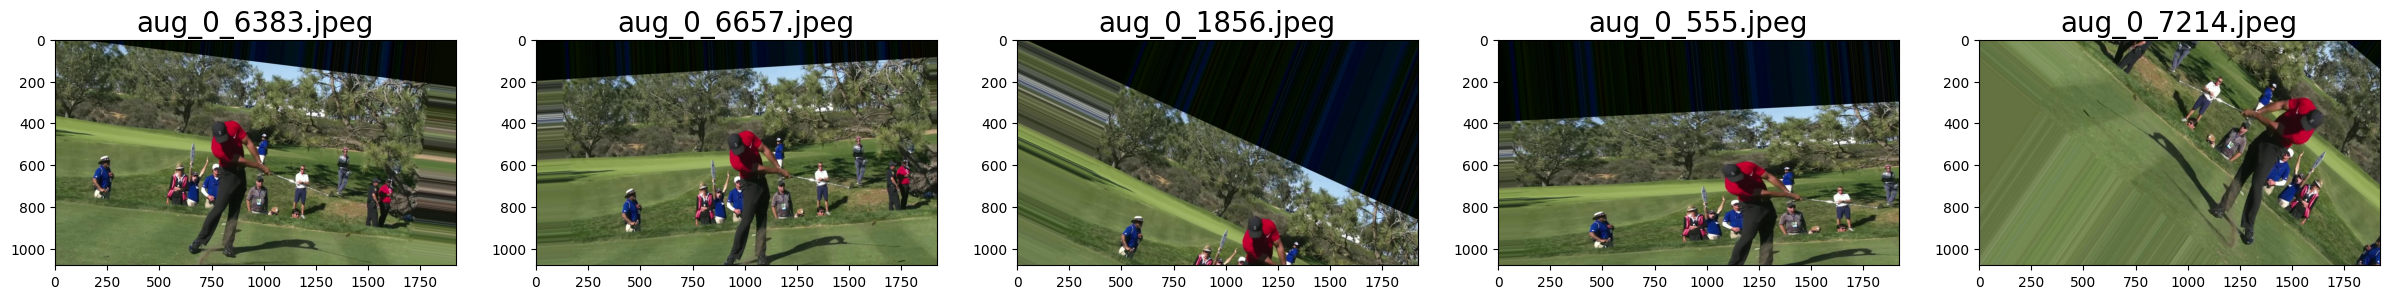

In [67]:
aug_image_path = 'C:/Users/getan/Desktop/augmented_images/'

image_files = [os.path.join(aug_image_path, filename) for filename in os.listdir(aug_image_path)]

num_samples = 5
selected_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(30,14))

# Display each selected image
for i, image_path in enumerate(selected_images):
    ax = axes[i] 
    img = mpimg.imread(image_path)  
    ax.imshow(img) 
    ax.set_title(os.path.basename(image_path), fontsize=20) 
    ax.axis('on')  

plt.show()


## Noise Reduction:
#### Remove noise: Apply one of the filters to reduce noise: Gaussian blur or median filtering or bilateral filtering.

In [63]:
blurred_image = resized_image.filter(ImageFilter.GaussianBlur(radius = 2))

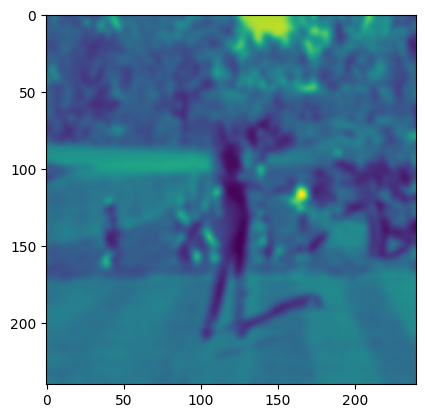

In [64]:
plt.imshow(blurred_image)